# AAPL trading strategy with Machine Learning

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
#warnings.filterwarnings('ignore')

In [2]:
# Read the stock price data
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-01,161.009995,163.589996,160.889999,161.509995,160.551315,67829400
1,2022-08-02,160.100006,162.410004,159.630005,160.009995,159.060211,59907000
2,2022-08-03,160.839996,166.589996,160.750000,166.130005,165.143890,82507500
3,2022-08-04,166.009995,167.190002,164.429993,165.809998,164.825790,55474100
4,2022-08-05,163.210007,165.850006,163.000000,165.350006,164.596848,56697000
...,...,...,...,...,...,...,...
245,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.750000,45377800
246,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
247,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
248,2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200


In [3]:
# Set the date column as index
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')  # drop the Date column
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,161.009995,163.589996,160.889999,161.509995,160.551315,67829400
2022-08-02,160.100006,162.410004,159.630005,160.009995,159.060211,59907000
2022-08-03,160.839996,166.589996,160.750000,166.130005,165.143890,82507500
2022-08-04,166.009995,167.190002,164.429993,165.809998,164.825790,55474100
2022-08-05,163.210007,165.850006,163.000000,165.350006,164.596848,56697000
...,...,...,...,...,...,...
2023-07-24,193.410004,194.910004,192.250000,192.750000,192.750000,45377800
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900


In [4]:
# Create a new rows:
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

# Store this in X variable:
X = df[['Open-Close', 'High-Low', 'Close']]
X.head()

,Open-Close,High-Low,Close
Date,,,
2022-08-01,-0.500000,2.699997,161.509995
2022-08-02,0.090011,2.779999,160.009995
2022-08-03,-5.290009,5.839996,166.130005
2022-08-04,0.199997,2.760009,165.809998
2022-08-05,-2.139999,2.850006,165.350006


In [5]:
# Target variable "y". If tomorrow close price is greater then today, then store "1":
y = np.where(df.Close.shift(-1) > df.Close, 1, 0)
y

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0])

In [6]:
# Split the data: 90% training set, 10% testing set
percentage_split = 0.9
row = int(df.shape[0] * percentage_split)

X_train = X[:row]
y_train = y[:row]

X_test = X[row:]
y_test = y[row:]

In [7]:
# we'll use SVC model - Support Vector Classifier

from sklearn.svm import SVC
model = SVC()
model.fit(X_train[['Open-Close', 'High-Low']], y_train)

SVC()

In [8]:
# Check the score of the model:
model.score(X_train[['Open-Close', 'High-Low']], y_train)

0.5422222222222223

In [9]:
model.score(X_test[['Open-Close', 'High-Low']], y_test)

0.52

In [10]:
# Make predictions: 
df['Predictions'] = model.predict(X[['Open-Close', 'High-Low']])
df['Predictions']

Date
2022-08-01    1
2022-08-02    1
2022-08-03    1
2022-08-04    1
2022-08-05    1
             ..
2023-07-24    1
2023-07-25    1
2023-07-26    1
2023-07-27    0
2023-07-28    1
Name: Predictions, Length: 250, dtype: int64

In [13]:
# Calculate the daily returns:
df['Return'] = df['Close'].pct_change(1)
df['Return']

Date
2022-08-01         NaN
2022-08-02   -0.009287
2022-08-03    0.038248
2022-08-04   -0.001926
2022-08-05   -0.002774
                ...   
2023-07-24    0.004220
2023-07-25    0.004514
2023-07-26    0.004545
2023-07-27   -0.006581
2023-07-28    0.013508
Name: Return, Length: 250, dtype: float64

In [12]:
# Calc the strategy returns:
df['Strat_Return'] = df['Predictions'].shift(1) * df['Return']
df['Strat_Return']

Date
2022-08-01         NaN
2022-08-02   -0.009287
2022-08-03    0.038248
2022-08-04   -0.001926
2022-08-05   -0.002774
                ...   
2023-07-24    0.004220
2023-07-25    0.004514
2023-07-26    0.004545
2023-07-27   -0.006581
2023-07-28    0.000000
Name: Strat_Return, Length: 250, dtype: float64

In [14]:
# Cumulative returns:
df['Cumul_Ret'] = df['Return'].cumsum()
df['Cumul_Strategy'] = df['Strat_Return'].cumsum()

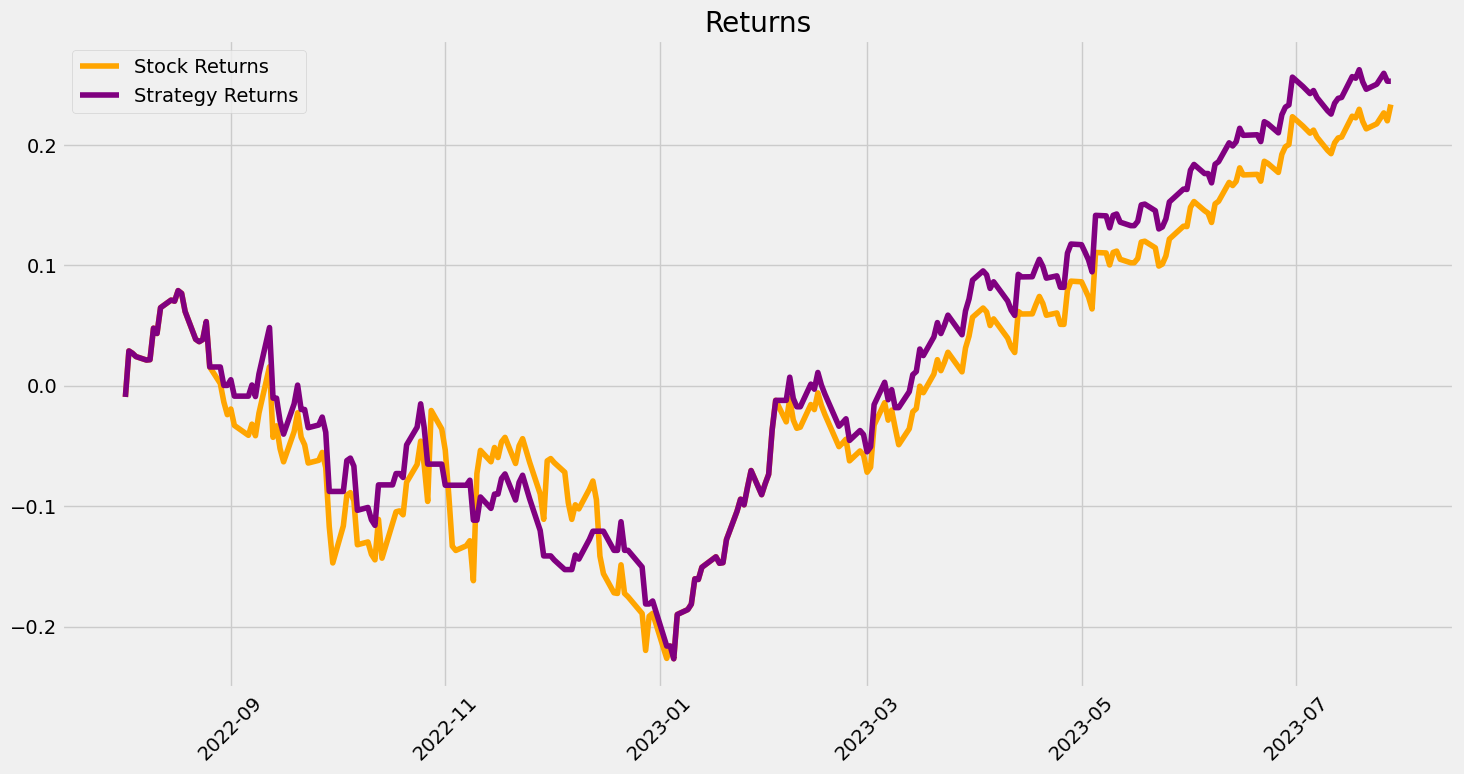

In [15]:
# Visualize the returns:

plt.figure(figsize=(16,8))
plt.title('Returns')
plt.plot(df['Cumul_Ret'], color = 'orange', label = 'Stock Returns')
plt.plot(df['Cumul_Strategy'], color = 'purple', label = 'Strategy Returns')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [16]:
# Total result in a year:
print('AAPL stock return: ', df['Cumul_Ret'][-1]*100, '%')
print('The strategy return: ', df['Cumul_Strategy'][-1]*100, '%')

AAPL stock return:  23.361293258258875 %
The strategy return:  25.299295194091087 %
